In [1]:
import random
import numpy as np
from numpy.linalg import norm as vector_norm
import matplotlib.pyplot as plt
from itertools import product
from sklearn import datasets

import sys
sys.path.append('../modules')
from nsw.nsw_classifier import NSWClassifier
from nsw.cut_classifier import CutClassifier

# Even-odd mnist classifier

In [2]:
digits = datasets.load_digits()
X, Y = [x.flatten() for x in digits.images], [int(x in [1, 2, 4, 7, 9]) for x in digits.target]
XY = list(zip(X, Y))
random.shuffle(XY)
train_mnist, test_mnist = XY[:9 * len(XY) // 10], XY[9 * len(XY) // 10:]

G = NSWClassifier()
G.build_navigable_graph(train_mnist, attempts=20, verbose=True)

Classifier is building a graph. Data dimensionality detected is 64. regularity = 192
Classifier graph is build in 106.428s


Initial cut size 110653


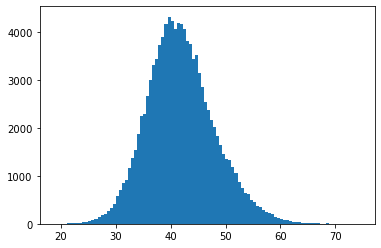

8085

In [3]:
rich_cut = [(e, G.dist(G.nodes[e[0]].value, G.nodes[e[1]].value)) for e in G.cut]
rich_cut.sort(key=lambda v: v[1])
print(f"Initial cut size {len(rich_cut)}")
lengths = [e[1] for e in rich_cut]
plt.hist(lengths, bins=100)
plt.show()
smaller_cut = rich_cut[:len(G.nodes) * 5]
print(f"Smaller cut size: {len(smaller_cut)}")

In [4]:
cclf = CutClassifier(G, smaller_cut)
clf = cclf.classifier

Graph initialized with cut (8085).
Clean cut (7573).
Shortest dist estimated (7.9373).
Support with 50 nodes is created.
Data dimensionality detected is 64. regularity = 192
	10.00% of graph construction
	20.00% of graph construction
	30.00% of graph construction
	40.00% of graph construction
	50.00% of graph construction
	60.00% of graph construction
	70.00% of graph construction
	80.00% of graph construction
	90.00% of graph construction
Support graph is built.
get_grad_field_function: Edge index is prepared.
Classifier function is ready.


In [7]:
true, true0, true1 = 0, 0, 0
tst = test_mnist[:20]
for t in tst:
    pc = clf(t[0], small=0.0001, R=64, closest=9, M=16)
    pci = int(pc > .5)
    true += pci == t[1]
    true0 += pci == t[1] and t[1] == 0
    true1 += pci == t[1] and t[1] == 1
    print("+" if pci == t[1] else "-", end="")

print(true, len(tst))
tp = true1
fn = sum(t[1] for t in tst) - tp
tn = true0
fp = (len(tst) - sum(t[1] for t in tst)) - tn
f1 = tp / (tp + (fn + fp) / 2)
print(f1)

---+++-+--++-++-++++12 20
0.5555555555555556


In [6]:
print(tp, fn, tn, fp)

4 6 7 3
